In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy

from IPython.display import display, HTML
from statsmodels.tsa.seasonal import seasonal_decompose

display(HTML("<style>div.output_scroll { height: 25em; }</style>"))
pd.set_option('display.float_format', '{:.3f}'.format)
sns.set(style="whitegrid")

data = pd.read_csv('../data/transactions_ds.csv', sep=';')

del data['price_ttc']

data['date'] = pd.to_datetime(data['date'])
# data['date'] = data['date'].dt.tz_convert('Europe/Paris')

data['year'] = data['date'].dt.year
data['year_week'] = data['date'].dt.isocalendar().week
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['weekday'] = data['date'].dt.day_name()

data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute

data['year_week'] = data['year_week'].astype('int64')

In [145]:
calendar = pd.read_json("../data/calendar.json")
weather = pd.read_csv('../data/weather_data.csv', sep=";")

weather['date'] = pd.to_datetime(weather['date'].str[:-6])

weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month
weather['day'] = weather['date'].dt.day
weather['hour'] = weather['date'].dt.hour

#weather = weather[(weather['hour'] >= 7) &
#                  (weather['hour'] < 22)]

In [172]:
weather.set_index('date').resample('3H').mean()['temp']

date
2010-01-01 00:00:00   0.200
2010-01-01 03:00:00   0.100
2010-01-01 06:00:00   0.200
2010-01-01 09:00:00   0.200
2010-01-01 12:00:00   1.200
                       ... 
2023-03-07 06:00:00   4.800
2023-03-07 09:00:00   5.700
2023-03-07 12:00:00   4.800
2023-03-07 15:00:00   4.200
2023-03-07 18:00:00   3.200
Freq: 3H, Name: temp, Length: 38511, dtype: float64

data = data.merge(weather, 
                  how='left', 
                  on=['year', 'month', 'day', 'hour'])

In [170]:
data[(data['year'] == 2021) &
     (data['month'] == 7)].set_index('date').resample('2H')['price_ht'].sum()

date
2021-07-01 08:00:00+00:00     57.780
2021-07-01 10:00:00+00:00    250.750
2021-07-01 12:00:00+00:00    360.210
2021-07-01 14:00:00+00:00    306.920
2021-07-01 16:00:00+00:00    200.590
                              ...   
2021-07-31 10:00:00+00:00   1427.210
2021-07-31 12:00:00+00:00    437.850
2021-07-31 14:00:00+00:00    386.830
2021-07-31 16:00:00+00:00    226.240
2021-07-31 18:00:00+00:00     69.850
Freq: 2H, Name: price_ht, Length: 366, dtype: float64

<AxesSubplot: xlabel='date', ylabel='temp'>

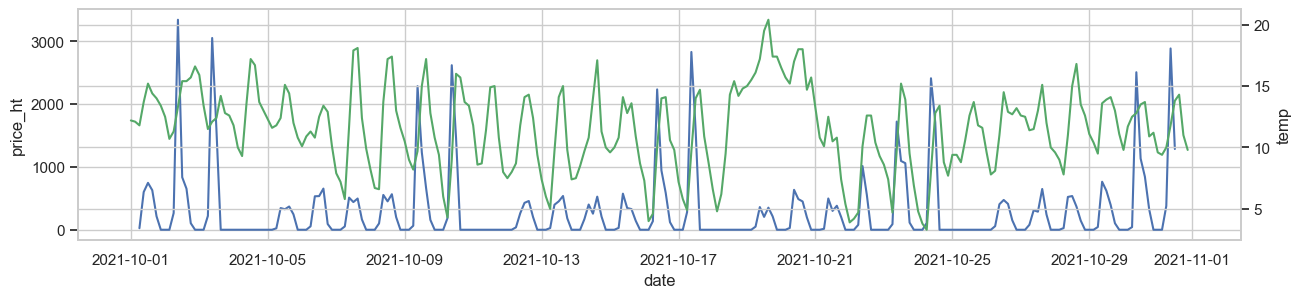

In [180]:
plot_1 = data[(data['year'] == 2021) &
              (data['month'] == 10)].set_index('date').resample('3H')['price_ht'].sum()
plot_2 = weather[(weather['year'] == 2021) &
                 (weather['month'] == 10)].set_index('date').resample('3H').mean()['temp']

fig, ax = plt.subplots(figsize=(15, 3))

sns.lineplot(data=plot_1, color="b")
ax2 = plt.twinx()
sns.lineplot(data=plot_2, color="g", ax=ax2)

In [136]:
weather[(weather['year'] == 2021) &
        (weather['day'] == 2) & 
        (weather['month'] == 1)]

,date,temp,humidity,wind,rain,cloud_cov,pressure,year,month,day,hour
32092,2021-01-02 01:00:00,-0.900,94.000,0.500,0.000,12.500,100770.000,2021,1,2,1
32093,2021-01-02 04:00:00,-1.000,94.000,1.900,0.000,100.000,100810.000,2021,1,2,4
32094,2021-01-02 07:00:00,-0.600,94.000,2.300,0.000,100.000,100800.000,2021,1,2,7
32095,2021-01-02 10:00:00,0.300,95.000,1.200,0.000,100.000,100880.000,2021,1,2,10
32096,2021-01-02 13:00:00,2.900,95.000,1.600,0.200,100.000,100830.000,2021,1,2,13
32097,2021-01-02 16:00:00,3.000,94.000,1.200,0.000,90.000,100800.000,2021,1,2,16
32098,2021-01-02 19:00:00,3.000,95.000,1.300,-0.100,100.000,100860.000,2021,1,2,19
32099,2021-01-02 22:00:00,2.500,96.000,1.200,0.200,101.000,100850.000,2021,1,2,22


In [131]:
data[(data['item_id'] == 11) &
     (data['year'] == 2021)]

,item_id,quantity,price_ht,transaction_id,date_x,year,year_week,month,day,weekday,hour,minute,date_y,temp,humidity,wind,rain,cloud_cov,pressure
253270,11,1.000,3.360,163224,2021-01-02 08:26:13+00:00,2021,53,1,2,Saturday,8,26,NaT,NaN,NaN,NaN,NaN,NaN,NaN
253289,11,1.000,65.210,163232,2021-01-02 09:24:30+00:00,2021,53,1,2,Saturday,9,24,NaT,NaN,NaN,NaN,NaN,NaN,NaN
253306,11,1.000,6.590,163238,2021-01-02 09:37:42+00:00,2021,53,1,2,Saturday,9,37,NaT,NaN,NaN,NaN,NaN,NaN,NaN
253314,11,1.000,10.240,163240,2021-01-02 09:42:31+00:00,2021,53,1,2,Saturday,9,42,NaT,NaN,NaN,NaN,NaN,NaN,NaN
253326,11,1.000,1.140,163247,2021-01-02 09:59:03+00:00,2021,53,1,2,Saturday,9,59,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380445,11,2.000,6.020,242516,2021-12-31 13:27:42+00:00,2021,52,12,31,Friday,13,27,2021-12-31 13:00:00,13.300,81.000,5.000,0.000,100.000,101420.000
380447,11,1.000,1.140,242518,2021-12-31 13:30:04+00:00,2021,52,12,31,Friday,13,30,2021-12-31 13:00:00,13.300,81.000,5.000,0.000,100.000,101420.000
380449,11,1.000,5.120,242519,2021-12-31 13:34:15+00:00,2021,52,12,31,Friday,13,34,2021-12-31 13:00:00,13.300,81.000,5.000,0.000,100.000,101420.000
380450,11,3.000,3.410,242520,2021-12-31 13:36:36+00:00,2021,52,12,31,Friday,13,36,2021-12-31 13:00:00,13.300,81.000,5.000,0.000,100.000,101420.000


In [130]:
data[(data['item_id'] == 11) &
     (data['year'] == 2021)].set_index('date_y')

,item_id,quantity,price_ht,transaction_id,date_x,year,year_week,month,day,weekday,hour,minute,temp,humidity,wind,rain,cloud_cov,pressure
date_y,,,,,,,,,,,,,,,,,,
NaT,11,1.000,3.360,163224,2021-01-02 08:26:13+00:00,2021,53,1,2,Saturday,8,26,NaN,NaN,NaN,NaN,NaN,NaN
NaT,11,1.000,65.210,163232,2021-01-02 09:24:30+00:00,2021,53,1,2,Saturday,9,24,NaN,NaN,NaN,NaN,NaN,NaN
NaT,11,1.000,6.590,163238,2021-01-02 09:37:42+00:00,2021,53,1,2,Saturday,9,37,NaN,NaN,NaN,NaN,NaN,NaN
NaT,11,1.000,10.240,163240,2021-01-02 09:42:31+00:00,2021,53,1,2,Saturday,9,42,NaN,NaN,NaN,NaN,NaN,NaN
NaT,11,1.000,1.140,163247,2021-01-02 09:59:03+00:00,2021,53,1,2,Saturday,9,59,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 13:00:00,11,2.000,6.020,242516,2021-12-31 13:27:42+00:00,2021,52,12,31,Friday,13,27,13.300,81.000,5.000,0.000,100.000,101420.000
2021-12-31 13:00:00,11,1.000,1.140,242518,2021-12-31 13:30:04+00:00,2021,52,12,31,Friday,13,30,13.300,81.000,5.000,0.000,100.000,101420.000
2021-12-31 13:00:00,11,1.000,5.120,242519,2021-12-31 13:34:15+00:00,2021,52,12,31,Friday,13,34,13.300,81.000,5.000,0.000,100.000,101420.000


In [124]:
data[(data['item_id'] == 11) &
     (data['year'] == 2021)].set_index('date_x').resample('W')['price_ht'].sum()

date_x
2021-01-03 00:00:00+00:00    914.210
2021-01-10 00:00:00+00:00   1648.950
2021-01-17 00:00:00+00:00   1211.960
2021-01-24 00:00:00+00:00   1463.650
2021-01-31 00:00:00+00:00   1492.270
2021-02-07 00:00:00+00:00   1400.490
2021-02-14 00:00:00+00:00   1210.710
2021-02-21 00:00:00+00:00   1422.780
2021-02-28 00:00:00+00:00   1790.730
2021-03-07 00:00:00+00:00   1904.830
2021-03-14 00:00:00+00:00   1550.720
2021-03-21 00:00:00+00:00   1504.860
2021-03-28 00:00:00+00:00   1340.440
2021-04-04 00:00:00+00:00   1584.320
2021-04-11 00:00:00+00:00   1628.160
2021-04-18 00:00:00+00:00   1615.320
2021-04-25 00:00:00+00:00   1523.490
2021-05-02 00:00:00+00:00   1632.500
2021-05-09 00:00:00+00:00   1205.420
2021-05-16 00:00:00+00:00   1702.860
2021-05-23 00:00:00+00:00   1414.210
2021-05-30 00:00:00+00:00   1425.460
2021-06-06 00:00:00+00:00   1302.300
2021-06-13 00:00:00+00:00   1166.320
2021-06-20 00:00:00+00:00   1165.250
2021-06-27 00:00:00+00:00   1021.920
2021-07-04 00:00:00+00:00   234